In [5]:
# Uncomment all for the first run on Colab
!tar -xf aclImdb_v1.tar.gz
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import os
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from collections import Counter
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

Convert training data into csv file

In [7]:
pathNeg = "aclImdb/train/neg"
files = os.listdir(pathNeg)
data = []
for file in files:
  if os.path.isfile(os.path.join(pathNeg, file)):
    id = int(file.split("_")[0])
    with open(os.path.join(pathNeg, file), encoding='utf8') as f:
      lines = f.read()
    data.append([id, lines, 0])

sizeOfNeg = 12500

pathPos = "aclImdb/train/pos"
files = os.listdir(pathPos)
for file in files:
  if os.path.isfile(os.path.join(pathPos, file)):
    id = int(file.split("_")[0]) + sizeOfNeg
    with open(os.path.join(pathPos, file), encoding='utf8') as f:
      lines = f.read()
    data.append([id, lines, 1])


df = pd.DataFrame(data, columns = ['id', 'text', 'score']).set_index('id').sort_index()
df.to_csv('train.csv')

Convert testing data into csv file

In [8]:
pathNeg = "aclImdb/test/neg"
files = os.listdir(pathNeg)
data = []
for file in files:
  if os.path.isfile(os.path.join(pathNeg, file)):
    id = int(file.split("_")[0])
    with open(os.path.join(pathNeg, file), encoding='utf8') as f:
      lines = f.read()
    data.append([id, lines, 0])

sizeOfNeg = 12500

pathPos = "aclImdb/test/pos"
files = os.listdir(pathPos)
for file in files:
  if os.path.isfile(os.path.join(pathPos, file)):
    id = int(file.split("_")[0]) + sizeOfNeg
    with open(os.path.join(pathPos, file), encoding='utf8') as f:
      lines = f.read()
    data.append([id, lines, 1])


df = pd.DataFrame(data, columns = ['id', 'text', 'score']).set_index('id').sort_index()
df.to_csv('test.csv')

convert vocab into csv file

In [9]:
with open("aclImdb/imdb.vocab", encoding='utf8') as f:
  vocab = []
  for line in f:
    vocab.append(line.rstrip())

vocab_df = pd.DataFrame(vocab, columns=['vocab'])
print(vocab_df)
vocab_df.to_csv('vocab_given.csv', index=False)

                   vocab
0                    the
1                    and
2                      a
3                     of
4                     to
...                  ...
89522          copywrite
89523             artbox
89524          kinky-sex
89525           urrrghhh
89526  investigator-like

[89527 rows x 1 columns]


In [10]:
from nltk.tokenize import word_tokenize

def tokenizeReview(review):
  review = review.replace('.', ' . ')
  tokens = word_tokenize(review.lower())
  return tokens

In [11]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Get vocab from training set

In [12]:
from collections import Counter
reviews = train_df['text'].tolist()
reviews = list(map(tokenizeReview, reviews))
reviews = [item for review in reviews for item in review]
vdict = Counter(reviews).most_common()

In [13]:
vocabs = []
for pair in vdict:
  vocabs.append(pair[0])

vocab_df = pd.DataFrame(vocabs, columns=['vocab'])
vocab_df.to_csv('vocab.csv', index=False)
print(vocab_df)

               vocab
0                the
1                  .
2                  ,
3                and
4                  a
...              ...
100550    people-and
100551         padre
100552   unmatchable
100553  scenery-wise
100554  non-teenager

[100555 rows x 1 columns]


Read training data and test data from csv file

In [14]:
vocab_df = pd.read_csv('vocab.csv')
print(vocab_df)

               vocab
0                the
1                  .
2                  ,
3                and
4                  a
...              ...
100550    people-and
100551         padre
100552   unmatchable
100553  scenery-wise
100554  non-teenager

[100555 rows x 1 columns]


In [15]:
vocab_dict = pd.Series(vocab_df.index + 1, index=vocab_df.vocab).to_dict()
# print(vocab_dict)

In [16]:
def convertToIndex(review):
  vec = []
  for word in review:
    if word in vocab_dict:
      vec.append(int(vocab_dict[word]))
    else:
      vec.append(0)
  return vec

In [17]:
train_df['tokens'] = train_df['text'].apply(tokenizeReview)
test_df['tokens'] = test_df['text'].apply(tokenizeReview)

In [18]:
train_df['vec'] = train_df['tokens'].apply(convertToIndex)
test_df['vec'] = test_df['tokens'].apply(convertToIndex)

In [19]:
train_df

,id,text,score,tokens,vec
0,0,Story of a man who has unnatural feelings for ...,0,"[story, of, a, man, who, has, unnatural, feeli...","[76, 6, 5, 141, 46, 56, 7522, 1382, 21, 5, 451..."
1,1,Robert DeNiro plays the most unbelievably inte...,0,"[robert, deniro, plays, the, most, unbelievabl...","[646, 5007, 306, 1, 106, 3768, 1072, 9205, 6, ..."
2,2,"I saw the capsule comment said ""great acting.""...",0,"[i, saw, the, capsule, comment, said, ``, grea...","[15, 225, 1, 9589, 902, 310, 28, 102, 128, 2, ..."
3,3,If I had not read Pat Barker's 'Union Street' ...,0,"[if, i, had, not, read, pat, barker, 's, 'unio...","[57, 15, 78, 32, 337, 3188, 7722, 18, 34406, 8..."
4,4,This fanciful horror flick has Vincent Price p...,0,"[this, fanciful, horror, flick, has, vincent, ...","[16, 16026, 212, 511, 56, 3152, 1785, 396, 5, ..."
...,...,...,...,...,...
24995,24995,What's Good About It: Some inventive and genui...,1,"[what, 's, good, about, it, :, some, inventive...","[60, 18, 62, 55, 13, 86, 61, 4389, 4, 2034, 93..."
24996,24996,For years we've been watching every horror fil...,1,"[for, years, we, 've, been, watching, every, h...","[21, 167, 82, 154, 93, 162, 187, 212, 25, 17, ..."
24997,24997,If you haven't already seen this movie of Mary...,1,"[if, you, have, n't, already, seen, this, movi...","[57, 29, 37, 31, 466, 125, 16, 23, 6, 13592, 4..."
24998,24998,this movie is the best movie ever it has a lot...,1,"[this, movie, is, the, best, movie, ever, it, ...","[16, 23, 8, 1, 132, 23, 137, 13, 56, 5, 185, 6..."


In [20]:
test_df

,id,text,score,tokens,vec
0,0,Once again Mr. Costner has dragged out a movie...,0,"[once, again, mr, ., costner, has, dragged, ou...","[292, 184, 450, 2, 9811, 56, 3291, 58, 5, 23, ..."
1,1,This is a pale imitation of 'Officer and a Gen...,0,"[this, is, a, pale, imitation, of, 'officer, a...","[16, 8, 5, 6404, 4969, 6, 0, 4, 5, 4907, 2, 87..."
2,2,"It seems ever since 1982, about every two or t...",0,"[it, seems, ever, since, 1982, ,, about, every...","[13, 199, 137, 244, 6605, 3, 55, 187, 123, 52,..."
3,3,"Wow, another Kevin Costner hero movie. Postman...",0,"[wow, ,, another, kevin, costner, hero, movie,...","[1297, 3, 169, 1795, 9811, 631, 23, 2, 10444, ..."
4,4,"Alas, another Costner movie that was an hour t...",0,"[alas, ,, another, costner, movie, that, was, ...","[2880, 3, 169, 9811, 23, 17, 19, 45, 566, 113,..."
...,...,...,...,...,...
24995,24995,"Sex, drugs, racism and of course you ABC's. Wh...",1,"[sex, ,, drugs, ,, racism, and, of, course, yo...","[404, 3, 1647, 3, 3054, 4, 6, 271, 29, 3630, 1..."
24996,24996,I love this show. My girlfriend was gonna get ...,1,"[i, love, this, show, ., my, girlfriend, was, ...","[15, 133, 16, 135, 2, 69, 998, 19, 2081, 1406,..."
24997,24997,"Seeing this show gives me respect for MTV, tho...",1,"[seeing, this, show, gives, me, respect, for, ...","[323, 16, 135, 405, 83, 1156, 21, 5225, 3, 163..."
24998,24998,I'm torn about this show. While MOST parts of ...,1,"[i, 'm, torn, about, this, show, ., while, mos...","[15, 160, 3203, 55, 16, 135, 2, 150, 106, 526,..."


In [21]:
print('Maximum review length: {}'.format(
len(max((train_df['tokens']), key=len))))
print('Minimum review length: {}'.format(
len(min((train_df['tokens']), key=len))))

Maximum review length: 2820
Minimum review length: 11


In [22]:
print('Maximum review length: {}'.format(
len(max((test_df['tokens']), key=len))))
print('Minimum review length: {}'.format(
len(min((test_df['tokens']), key=len))))

Maximum review length: 2944
Minimum review length: 8


In [23]:
max_words = 500
dataset = sequence.pad_sequences(train_df['vec'], maxlen=max_words)
y = train_df['score']

In [24]:
# X_train, X_val, y_train, y_val = train_test_split(dataset, y, test_size=0.3, stratify=y, random_state = 42)
X_train = dataset
y_train = y

max_words = 500
X_test = sequence.pad_sequences(test_df['vec'], maxlen=max_words)
y_test = test_df['score']

In [25]:
vocab_size = len(vocab_dict) + 1
print(vocab_size)

100555


Simple RNN

In [26]:
from keras import Sequential
from keras.layers import Embedding, Dense, Dropout, SimpleRNN
embedding_size=32
model_simple_rnn = Sequential()
model_simple_rnn.add(Embedding(vocab_size, embedding_size, input_length=max_words))
model_simple_rnn.add(SimpleRNN(50, input_shape=(X_train.shape[1],1), activation='tanh'))
model_simple_rnn.add(Dense(1, activation='sigmoid'))
model_simple_rnn.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])
print(model_simple_rnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           3217760   
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                4150      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 3,221,961
Trainable params: 3,221,961
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
batch_size=32
model_simple_rnn.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
782/782 [==============================] - 132s 167ms/step - loss: 0.5899 - accuracy: 0.6778
Epoch 2/5
782/782 [==============================] - 126s 161ms/step - loss: 0.3775 - accuracy: 0.8406
Epoch 3/5
782/782 [==============================] - 140s 179ms/step - loss: 0.2938 - accuracy: 0.8835
Epoch 4/5
782/782 [==============================] - 125s 159ms/step - loss: 0.2813 - accuracy: 0.8890
Epoch 5/5
782/782 [==============================] - 155s 198ms/step - loss: 0.1908 - accuracy: 0.9315


In [28]:
scores = model_simple_rnn.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8183599710464478


In [29]:
model_simple_rnn.save('basic_simple_rnn_model')

INFO:tensorflow:Assets written to: basic_simple_rnn_model/assets


GRU

In [30]:
from keras.layers import GRU
embedding_size=32
model_gru = Sequential()
model_gru.add(Embedding(vocab_size, embedding_size, input_length=max_words))
model_gru.add(GRU(50, input_shape=(X_train.shape[1],1), activation='tanh'))
model_gru.add(Dense(1, activation='sigmoid'))
model_gru.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])
print(model_gru.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           3217760   
                                                                 
 gru (GRU)                   (None, 50)                12600     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,230,411
Trainable params: 3,230,411
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
batch_size=32
model_gru.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
782/782 [==============================] - 271s 341ms/step - loss: 0.6804 - accuracy: 0.6526
Epoch 2/5
782/782 [==============================] - 229s 293ms/step - loss: 0.2997 - accuracy: 0.8773
Epoch 3/5
782/782 [==============================] - 228s 292ms/step - loss: 0.1562 - accuracy: 0.9437
Epoch 4/5
782/782 [==============================] - 228s 292ms/step - loss: 0.0852 - accuracy: 0.9711
Epoch 5/5
782/782 [==============================] - 274s 351ms/step - loss: 0.0493 - accuracy: 0.9850


In [32]:
scores = model_gru.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8468000292778015


In [33]:
model_gru.save('basic_gru_model')

INFO:tensorflow:Assets written to: basic_gru_model/assets


LSTM

In [148]:
from keras.layers import LSTM
embedding_size=32
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, embedding_size, input_length=max_words))
model_lstm.add(LSTM(50, input_shape=(X_train.shape[1],1), activation='tanh'))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])
print(model_lstm.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 500, 32)           3217760   
                                                                 
 lstm_6 (LSTM)               (None, 50)                16600     
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,234,411
Trainable params: 3,234,411
Non-trainable params: 0
_________________________________________________________________
None


In [149]:
batch_size=32
model_lstm.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
782/782 [==============================] - 248s 314ms/step - loss: 0.4395 - accuracy: 0.7908
Epoch 2/5
782/782 [==============================] - 248s 317ms/step - loss: 0.2208 - accuracy: 0.9182
Epoch 3/5
782/782 [==============================] - 248s 318ms/step - loss: 0.1339 - accuracy: 0.9554
Epoch 4/5
782/782 [==============================] - 246s 315ms/step - loss: 0.1240 - accuracy: 0.9598
Epoch 5/5
782/782 [==============================] - 245s 313ms/step - loss: 0.0673 - accuracy: 0.9788


In [150]:
scores = model_lstm.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8389599919319153


In [151]:
model_lstm.save('basic_lstm_model')

INFO:tensorflow:Assets written to: basic_lstm_model/assets


INFO:tensorflow:Assets written to: basic_lstm_model/assets


Predictions

In [152]:
predictions_simple_rnn = model_simple_rnn.predict(X_test)
predictions_gru = model_gru.predict(X_test)
predictions_lstm = model_lstm.predict(X_test)

In [153]:
def to_binary(x):
  if x < 0.5:
    return 0
  else:
    return 1

y_test_list = np.ndarray.tolist(pd.Series.to_numpy(y_test))
y_test_list = list(map(lambda x: to_binary(x), y_test_list))

predictions_list_simple_rnn = np.ndarray.tolist(predictions_simple_rnn)
predictions_list_simple_rnn = [item for sublist in predictions_list_simple_rnn for item in sublist]
predictions_list_simple_rnn = list(map(lambda x: to_binary(x), predictions_list_simple_rnn))

predictions_list_gru = np.ndarray.tolist(predictions_gru)
predictions_list_gru = [item for sublist in predictions_list_gru for item in sublist]
predictions_list_gru = list(map(lambda x: to_binary(x), predictions_list_gru))

predictions_list_lstm = np.ndarray.tolist(predictions_lstm)
predictions_list_lstm = [item for sublist in predictions_list_lstm for item in sublist]
predictions_list_lstm = list(map(lambda x: to_binary(x), predictions_list_lstm))

total = 0
correct_simple_rnn = 0
correct_gru = 0
correct_lstm = 0

correct_review_simple_rnn = []
correct_review_gru = []
correct_review_lstm = []
wrong_review_simple_rnn = []
wrong_review_gru = []
wrong_review_lstm = []

total_review_len = {}
correct_review_len_simple_rnn = {}
correct_review_len_gru = {}
correct_review_len_lstm = {}
wrong_review_len_simple_rnn = {}
wrong_review_len_gru = {}
wrong_review_len_lstm = {}

for i in range(len(y_test_list)):
  if len(test_df['tokens'][i]) in total_review_len:
    total_review_len[len(test_df['tokens'][i])] += 1
  else:
    total_review_len[len(test_df['tokens'][i])] = 1

  if y_test_list[i] == predictions_list_simple_rnn[i]:
    correct_simple_rnn += 1
    correct_review_simple_rnn.append(i)
    if len(test_df['tokens'][i]) in correct_review_len_simple_rnn:
      correct_review_len_simple_rnn[len(test_df['tokens'][i])] += 1
    else:
      correct_review_len_simple_rnn[len(test_df['tokens'][i])] = 1
  else:
    wrong_review_simple_rnn.append(i)
    if len(test_df['tokens'][i]) in wrong_review_len_simple_rnn:
      wrong_review_len_simple_rnn[len(test_df['tokens'][i])] += 1
    else:
      wrong_review_len_simple_rnn[len(test_df['tokens'][i])] = 1

  if y_test_list[i] == predictions_list_gru[i]:
    correct_gru += 1
    correct_review_gru.append(i)
    if len(test_df['tokens'][i]) in correct_review_len_gru:
      correct_review_len_gru[len(test_df['tokens'][i])] += 1
    else:
      correct_review_len_gru[len(test_df['tokens'][i])] = 1
  else:
    wrong_review_gru.append(i)
    if len(test_df['tokens'][i]) in wrong_review_len_gru:
      wrong_review_len_gru[len(test_df['tokens'][i])] += 1
    else:
      wrong_review_len_gru[len(test_df['tokens'][i])] = 1

  if y_test_list[i] == predictions_list_lstm[i]:
    correct_lstm += 1
    correct_review_lstm.append(i)
    if len(test_df['tokens'][i]) in correct_review_len_lstm:
      correct_review_len_lstm[len(test_df['tokens'][i])] += 1
    else:
      correct_review_len_lstm[len(test_df['tokens'][i])] = 1
  else:
    wrong_review_lstm.append(i)
    if len(test_df['tokens'][i]) in wrong_review_len_lstm:
      wrong_review_len_lstm[len(test_df['tokens'][i])] += 1
    else:
      wrong_review_len_lstm[len(test_df['tokens'][i])] = 1
  
  total += 1

print("Total: ", total)
print("\nSimple RNN")
print("Correct: ", correct_simple_rnn)
print("Accuracy: ", correct_simple_rnn/total)
print("\nGRU")
print("Correct: ", correct_gru)
print("Accuracy: ", correct_gru/total)
print("\nLSTM")
print("Correct: ", correct_lstm)
print("Accuracy: ", correct_lstm/total)

Total:  25000

Simple RNN
Correct:  20459
Accuracy:  0.81836

GRU
Correct:  21170
Accuracy:  0.8468

LSTM
Correct:  20974
Accuracy:  0.83896


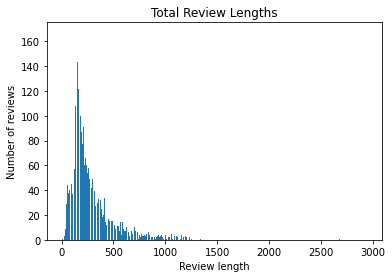

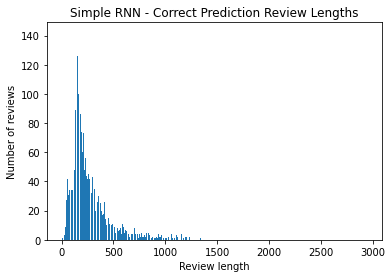

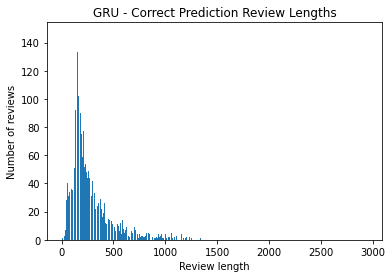

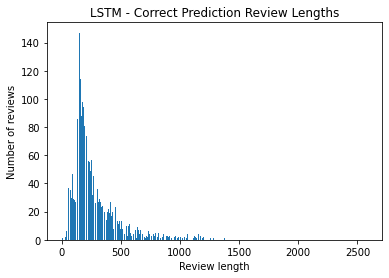

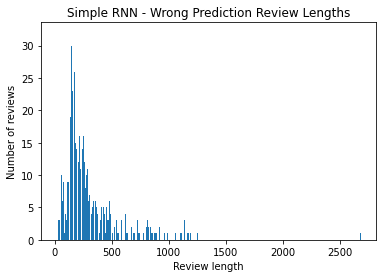

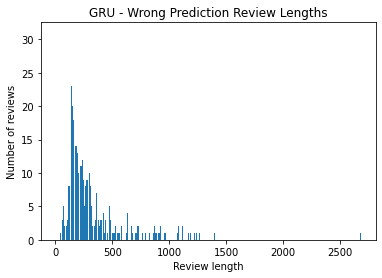

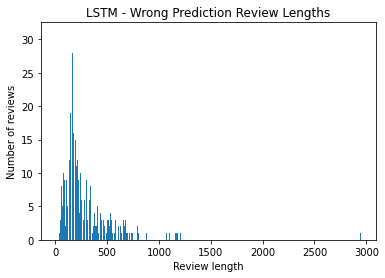

In [154]:
# See if review length is a factor that differentiates between different models' performances

import matplotlib.pyplot as plt
total_review_len = dict(sorted(total_review_len.items()))
correct_review_len_simple_rnn = dict(sorted(correct_review_len_simple_rnn.items()))
correct_review_len_gru = dict(sorted(correct_review_len_gru.items()))
correct_review_len_lstm = dict(sorted(correct_review_len_lstm.items()))
wrong_review_len_simple_rnn = dict(sorted(wrong_review_len_simple_rnn.items()))
wrong_review_len_gru = dict(sorted(wrong_review_len_gru.items()))
wrong_review_len_lstm = dict(sorted(wrong_review_len_lstm.items()))

plt.bar(list(total_review_len.keys()), list(total_review_len.values()))
plt.title('Total Review Lengths')
plt.xlabel("Review length")
plt.ylabel("Number of reviews")
plt.show()

plt.bar(list(correct_review_len_simple_rnn.keys()), list(correct_review_len_simple_rnn.values()))
plt.title('Simple RNN - Correct Prediction Review Lengths')
plt.xlabel("Review length")
plt.ylabel("Number of reviews")
plt.show()

plt.bar(list(correct_review_len_gru.keys()), list(correct_review_len_gru.values()))
plt.title('GRU - Correct Prediction Review Lengths')
plt.xlabel("Review length")
plt.ylabel("Number of reviews")
plt.show()

plt.bar(list(correct_review_len_lstm.keys()), list(correct_review_len_lstm.values()))
plt.title('LSTM - Correct Prediction Review Lengths')
plt.xlabel("Review length")
plt.ylabel("Number of reviews")
plt.show()

plt.bar(list(wrong_review_len_simple_rnn.keys()), list(wrong_review_len_simple_rnn.values()))
plt.title('Simple RNN - Wrong Prediction Review Lengths')
plt.xlabel("Review length")
plt.ylabel("Number of reviews")
plt.show()

plt.bar(list(wrong_review_len_gru.keys()), list(wrong_review_len_gru.values()))
plt.title('GRU - Wrong Prediction Review Lengths')
plt.xlabel("Review length")
plt.ylabel("Number of reviews")
plt.show()

plt.bar(list(wrong_review_len_lstm.keys()), list(wrong_review_len_lstm.values()))
plt.title('LSTM - Wrong Prediction Review Lengths')
plt.xlabel("Review length")
plt.ylabel("Number of reviews")
plt.show()

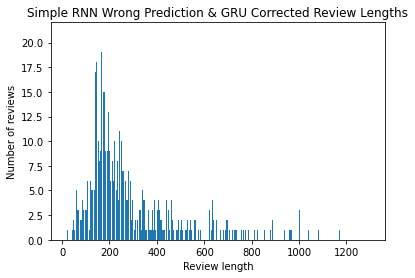

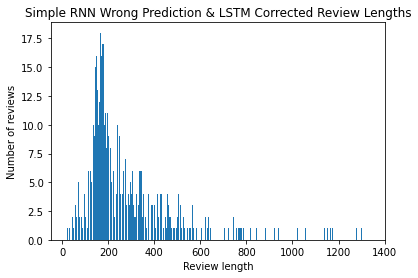

In [155]:
correct_review_gru_set = set(correct_review_gru)
gru_corrected = []

correct_review_lstm_set = set(correct_review_lstm)
lstm_corrected = []

for i in wrong_review_simple_rnn:
  if i in correct_review_gru_set:
    gru_corrected.append(i)
  if i in correct_review_lstm_set:
    lstm_corrected.append(i)

gru_corrected_review_len = {}
for i in gru_corrected:
  review_len = len(test_df['tokens'][i])
  if review_len in gru_corrected_review_len:
    gru_corrected_review_len[review_len] += 1
  else:
    gru_corrected_review_len[review_len] = 1

lstm_corrected_review_len = {}
for i in lstm_corrected:
  review_len = len(test_df['tokens'][i])
  if review_len in lstm_corrected_review_len:
    lstm_corrected_review_len[review_len] += 1
  else:
    lstm_corrected_review_len[review_len] = 1

gru_corrected_review_len = dict(sorted(gru_corrected_review_len.items()))
lstm_corrected_review_len = dict(sorted(lstm_corrected_review_len.items()))

plt.bar(list(gru_corrected_review_len.keys()), list(gru_corrected_review_len.values()))
plt.title('Simple RNN Wrong Prediction & GRU Corrected Review Lengths')
plt.xlabel("Review length")
plt.ylabel("Number of reviews")
plt.show()

plt.bar(list(lstm_corrected_review_len.keys()), list(lstm_corrected_review_len.values()))
plt.title('Simple RNN Wrong Prediction & LSTM Corrected Review Lengths')
plt.xlabel("Review length")
plt.ylabel("Number of reviews")
plt.show()

In [156]:
for i in gru_corrected[:20]:
  review_len = len(test_df['tokens'][i])
  print("Review #" + str(i) + ": " + ' '.join(test_df['tokens'][i]))
  print("No. of tokens: " + str(review_len) + ", Score: " + str(test_df['score'][i]))
  print()

Review #2: it seems ever since 1982 , about every two or three years we get a movie that claims to be `` the next officer and a gentleman . `` there has yet to be one movie that has lived up to this claim and this movie is no different . < br / > < br / > we get the usual ripped off scenes from oaag ( `` i want you dor , '' the instructor gives the richard gere character his overdose of drills in hopes he 'll quit , the gere character comes back for the girl , the gere character realizes the instructor is great , etc . ) and this movie is as predictable as the sun rising in the east and is horribly miscast on top . costner plays his usual `` wise teacher '' character , the only character he can play , and you really get a sense of his limited acting abilities here . kutcher is terrible in the richard gere character , just miscast with acting skills barely a notch above keanu reeves . < br / > < br / > the main problem with this oaag wannabe is the two main characters are so amazingly o

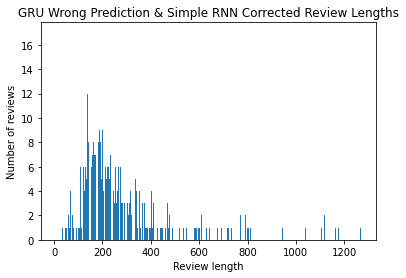

In [157]:
correct_review_simple_rnn_set = set(correct_review_simple_rnn)
simple_rnn_corrected = [] # Check reviews that GRU got wrong that simple rnn got right

for i in wrong_review_gru:
  if i in correct_review_simple_rnn_set:
    simple_rnn_corrected.append(i)

simple_rnn_corrected_review_len = {}
for i in simple_rnn_corrected:
  review_len = len(test_df['tokens'][i])
  if review_len in simple_rnn_corrected_review_len:
    simple_rnn_corrected_review_len[review_len] += 1
  else:
    simple_rnn_corrected_review_len[review_len] = 1

plt.bar(list(simple_rnn_corrected_review_len.keys()), list(simple_rnn_corrected_review_len.values()))
plt.title('GRU Wrong Prediction & Simple RNN Corrected Review Lengths')
plt.xlabel("Review length")
plt.ylabel("Number of reviews")
plt.show()

In [158]:
for i in simple_rnn_corrected[:20]:
  print("Review #" + str(i) + ": " + ' '.join(test_df['tokens'][i]))
  print()

Review #0: once again mr . costner has dragged out a movie for far longer than necessary . aside from the terrific sea rescue sequences , of which there are very few i just did not care about any of the characters . most of us have ghosts in the closet , and costner 's character are realized early on , and then forgotten until much later , by which time i did not care . the character we should really care about is a very cocky , overconfident ashton kutcher . the problem is he comes off as kid who thinks he 's better than anyone else around him and shows no signs of a cluttered closet . his only obstacle appears to be winning over costner . finally when we are well past the half way point of this stinker , costner tells us all about kutcher 's ghosts . we are told why kutcher is driven to be the best with no prior inkling or foreshadowing . no magic here , it was all i could do to keep from turning it off an hour in .

Review #9: david bryce 's comments nearby are exceptionally well wr

In [159]:
print("Simple RNN")
print("Review 90 start")
review_90_start = "the only reason this movie is not given a 1 ( awful ) vote"
print(review_90_start)
review_90_start = convertToIndex(tokenizeReview(review_90_start))
review_90_start = sequence.pad_sequences([review_90_start], maxlen=max_words)
print("Score: " + str(to_binary(model_simple_rnn.predict(review_90_start))))

print("\nReview 90 end")
review_90_end = "I recommend watching this movie just to see what oddities you can find"
print(review_90_end)
review_90_end = convertToIndex(tokenizeReview(review_90_end))
review_90_end = sequence.pad_sequences([review_90_end], maxlen=max_words)
print("Score: " + str(to_binary(model_simple_rnn.predict(review_90_end))))

print("\nReview 90 full")
review_90_full = "The only reason this movie is not given a 1 (awful) vote is that the acting of both Ida Lupino and Robert Ryan is superb. Ida Lupino who is lovely, as usual, becomes increasingly distraught as she tries various means to rid herself of a madman. Robert Ryan is terrifying as the menacing stranger whose character, guided only by his disturbed mind, changes from one minute to the next. Seemingly simple and docile, suddenly he becomes clever and threatening. Ms. Lupino's character was in more danger from that house she lived in and her own stupidity than by anyone who came along. She could not manage to get out of her of her own house: windows didn't open, both front and back doors locked and unlocked from the inside with a key. You could not have designed a worse fire-trap if you tried. She did not take the precaution of having even one extra key. Nor could she figure out how to summon help from nearby neighbors or get out of her own basement while she was locked in and out of sight of her captor. I don't know what war her husband was killed in, but if it was World War II, the furnishings in her house, the styles of the clothes, especially the children and the telephone company repairman's car are clearly anachronistic. I recommend watching this movie just to see what oddities you can find."
print(review_90_full)
review_90_full = convertToIndex(tokenizeReview(review_90_full))
review_90_full = sequence.pad_sequences([review_90_full], maxlen=max_words)
print("Score: " + str(to_binary(model_simple_rnn.predict(review_90_full))))

Simple RNN
Review 90 start
the only reason this movie is not given a 1 ( awful ) vote
Score: 0

Review 90 end
I recommend watching this movie just to see what oddities you can find
Score: 1

Review 90 full
The only reason this movie is not given a 1 (awful) vote is that the acting of both Ida Lupino and Robert Ryan is superb. Ida Lupino who is lovely, as usual, becomes increasingly distraught as she tries various means to rid herself of a madman. Robert Ryan is terrifying as the menacing stranger whose character, guided only by his disturbed mind, changes from one minute to the next. Seemingly simple and docile, suddenly he becomes clever and threatening. Ms. Lupino's character was in more danger from that house she lived in and her own stupidity than by anyone who came along. She could not manage to get out of her of her own house: windows didn't open, both front and back doors locked and unlocked from the inside with a key. You could not have designed a worse fire-trap if you tried. 

In [160]:
review_161_end = "i strongly advise avoiding `` the edge of love '' , unless you watch a film only to appreciate great costumes , nice sets and lighting"
print("Review 161 end: " + review_161_end)
review_161_end = convertToIndex(tokenizeReview(review_161_end))
review_161_end = sequence.pad_sequences([review_161_end], maxlen=max_words)

print("Simple RNN prediction: " + str(to_binary(model_simple_rnn.predict(review_161_end))))
print("GRU prediction: " + str(to_binary(model_gru.predict(review_161_end))))

Review 161 end: i strongly advise avoiding `` the edge of love '' , unless you watch a film only to appreciate great costumes , nice sets and lighting
Simple RNN prediction: 1
GRU prediction: 0


In [161]:
def tokenizeReviewTrimmed(review):
  return tokenizeReview(review)[-50:]

# train_df['tokens_trimmed'] = train_df['text'].apply(tokenizeReviewTrimmed)
test_df['tokens_trimmed'] = test_df['text'].apply(tokenizeReviewTrimmed)
# train_df['vec_trimmed'] = train_df['tokens_trimmed'].apply(convertToIndex)
test_df['vec_trimmed'] = test_df['tokens_trimmed'].apply(convertToIndex)

max_words_trimmed = 500
X_train_trimmed = sequence.pad_sequences(train_df['vec_trimmed'], maxlen=max_words_trimmed)
X_test_trimmed = sequence.pad_sequences(test_df['vec_trimmed'], maxlen=max_words_trimmed)

scores = model_simple_rnn.evaluate(X_test_trimmed, y_test, verbose=0)
print('Simple RNN test accuracy:', scores[1])

scores = model_gru.evaluate(X_test_trimmed, y_test, verbose=0)
print('GRU test accuracy:', scores[1])

scores = model_lstm.evaluate(X_test_trimmed, y_test, verbose=0)
print('LSTM test accuracy:', scores[1])

Simple RNN test accuracy: 0.7853999733924866
GRU test accuracy: 0.7732800245285034
LSTM test accuracy: 0.7808399796485901


In [162]:
def tokenizeReviewTrimmed(review):
  return tokenizeReview(review)[-100:]

# train_df['tokens_trimmed'] = train_df['text'].apply(tokenizeReviewTrimmed)
test_df['tokens_trimmed'] = test_df['text'].apply(tokenizeReviewTrimmed)
# train_df['vec_trimmed'] = train_df['tokens_trimmed'].apply(convertToIndex)
test_df['vec_trimmed'] = test_df['tokens_trimmed'].apply(convertToIndex)

max_words_trimmed = 500
X_train_trimmed = sequence.pad_sequences(train_df['vec_trimmed'], maxlen=max_words_trimmed)
X_test_trimmed = sequence.pad_sequences(test_df['vec_trimmed'], maxlen=max_words_trimmed)

scores = model_simple_rnn.evaluate(X_test_trimmed, y_test, verbose=0)
print('Simple RNN test accuracy:', scores[1])

scores = model_gru.evaluate(X_test_trimmed, y_test, verbose=0)
print('GRU test accuracy:', scores[1])

scores = model_lstm.evaluate(X_test_trimmed, y_test, verbose=0)
print('LSTM test accuracy:', scores[1])

Simple RNN test accuracy: 0.8100399971008301
GRU test accuracy: 0.8052399754524231
LSTM test accuracy: 0.8190799951553345


In [163]:
def tokenizeReviewTrimmed(review):
  return tokenizeReview(review)[-150:]

# train_df['tokens_trimmed'] = train_df['text'].apply(tokenizeReviewTrimmed)
test_df['tokens_trimmed'] = test_df['text'].apply(tokenizeReviewTrimmed)
# train_df['vec_trimmed'] = train_df['tokens_trimmed'].apply(convertToIndex)
test_df['vec_trimmed'] = test_df['tokens_trimmed'].apply(convertToIndex)

max_words_trimmed = 500
X_train_trimmed = sequence.pad_sequences(train_df['vec_trimmed'], maxlen=max_words_trimmed)
X_test_trimmed = sequence.pad_sequences(test_df['vec_trimmed'], maxlen=max_words_trimmed)

scores = model_simple_rnn.evaluate(X_test_trimmed, y_test, verbose=0)
print('Simple RNN test accuracy:', scores[1])

scores = model_gru.evaluate(X_test_trimmed, y_test, verbose=0)
print('GRU test accuracy:', scores[1])

scores = model_lstm.evaluate(X_test_trimmed, y_test, verbose=0)
print('LSTM test accuracy:', scores[1])

Simple RNN test accuracy: 0.8165199756622314
GRU test accuracy: 0.8249199986457825
LSTM test accuracy: 0.8320800065994263
